In [1]:
import os
os.chdir('/scratch/sagarsj42')

In [2]:
import json

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
!scp sagarsj42@ada:/share1/sagarsj42/semeval-2022_task8_train-data_batch.csv .
!scp sagarsj42@ada:/share1/sagarsj42/semeval_8_2022_data.zip .
!unzip -oq semeval_8_2022_data.zip
!scp sagarsj42@ada:/share1/sagarsj42/semeval-2022_task8_eval_data_202201.csv .
!scp sagarsj42@ada:/share1/sagarsj42/semeval-2022_task8_eval_data.zip .
!unzip -oq semeval-2022_task8_eval_data.zip

semeval-2022_task8_train-data_batch.csv       100% 2674KB   2.6MB/s   00:01    
semeval_8_2022_data.zip                       100%  304MB 101.2MB/s   00:03    
semeval-2022_task8_eval_data_202201.csv       100% 2344KB   2.3MB/s   00:00    
semeval-2022_task8_eval_data.zip              100%  271MB  90.3MB/s   00:03    


In [4]:
TRAIN_PATH = 'downloaded-data'

In [5]:
train_data = pd.read_csv('semeval-2022_task8_train-data_batch.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   url1_lang  4964 non-null   object 
 1   url2_lang  4964 non-null   object 
 2   pair_id    4964 non-null   object 
 3   link1      4964 non-null   object 
 4   link2      4964 non-null   object 
 5   ia_link1   4964 non-null   object 
 6   ia_link2   4964 non-null   object 
 7   Geography  4964 non-null   float64
 8   Entities   4964 non-null   float64
 9   Time       4964 non-null   float64
 10  Narrative  4964 non-null   float64
 11  Overall    4964 non-null   float64
 12  Style      4964 non-null   float64
 13  Tone       4964 non-null   float64
dtypes: float64(7), object(7)
memory usage: 543.1+ KB


In [6]:
train_data.head()

,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2,Geography,Entities,Time,Narrative,Overall,Style,Tone
0,en,en,1484084337_1484110209,https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com/world/the_ameri...,https://web.archive.org/web/www.washingtonpost...,https://web.archive.org/web/www.washingtonpost...,4.0,4.000000,1.000000,4.000000,4.000000,1.666667,2.000000
1,en,en,1484396422_1483924666,https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com/news/world/europe/2020...,https://web.archive.org/web/www.stlucianewsonl...,https://web.archive.org/web/www.thestar.com/ne...,4.0,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333
2,en,en,1484698254_1483758694,https://www.teaparty.org/trump-brings-in-2020-...,https://www.timesofisrael.com/trump-says-he-do...,https://web.archive.org/web/www.teaparty.org/t...,https://web.archive.org/web/www.timesofisrael....,1.0,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333
3,en,en,1576314516_1576455088,https://gadgets.ndtv.com/apps/news/zomato-uber...,https://gadgets.ndtv.com/internet/news/indian-...,https://web.archive.org/web/gadgets.ndtv.com/a...,https://web.archive.org/web/gadgets.ndtv.com/i...,1.0,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667
4,en,en,1484036253_1483894099,https://news.yahoo.com/india-approves-third-mo...,https://www.channelnewsasia.com/news/asia/indi...,https://web.archive.org/web/news.yahoo.com/ind...,https://web.archive.org/web/www.channelnewsasi...,1.0,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000


In [7]:
overall_scores = train_data.Overall.to_numpy()
print(overall_scores.shape)
overall_scores.min(), overall_scores.max(), np.median(overall_scores), overall_scores.mean(), overall_scores.std()

(4964,)


(1.0, 4.0, 3.0, 2.8033685391965, 1.1337595163008565)

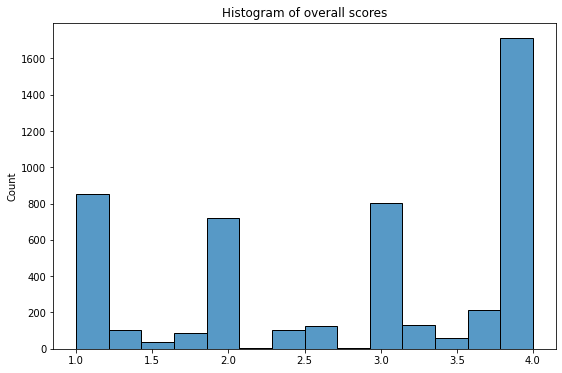

In [8]:
plt.figure(figsize=(9, 6))
sns.histplot(overall_scores)
plt.title('Histogram of overall scores')
plt.show()

In [9]:
file = '1502416604.json'
subfolder = file[-7:-5]
with open(os.path.join(TRAIN_PATH, subfolder, file), 'r') as f:
    sample = json.load(f)

sample.keys(), sample

(dict_keys(['source_url', 'url', 'title', 'top_image', 'meta_img', 'images', 'movies', 'text', 'keywords', 'meta_keywords', 'tags', 'authors', 'publish_date', 'summary', 'article_html', 'meta_description', 'meta_lang', 'meta_favicon', 'meta_data', 'canonical_link']),
 {'source_url': 'https://wiadomosci.wp.pl',
  'url': 'https://wiadomosci.wp.pl/lidia-staron-ma-stanac-na-czele-nowej-komisji-w-senacie-6470680555329665a',
  'title': 'Lidia Staroń ma stanąć na czele nowej komisji w Senacie',
  'top_image': 'https://v.wpimg.pl/MjYzNzcwYgs4GDhJTAxvHntAbBMKVWFILFh0WExHYlhpSn4CUkR1WXYeYA0THiANdwoiVVpHfl5hTX1PTlp4Wm9Jd0NTRXVFNRMqEwJaPh44CCEUTR09DXsH',
  'meta_img': 'https://v.wpimg.pl/MjYzNzcwYgs4GDhJTAxvHntAbBMKVWFILFh0WExHYlhpSn4CUkR1WXYeYA0THiANdwoiVVpHfl5hTX1PTlp4Wm9Jd0NTRXVFNRMqEwJaPh44CCEUTR09DXsH',
  'images': ['https://v.wpimg.pl/MjYzNzcwYgs4GDhJTAxvHntAbBMKVWFILFh0WEw4Yl5sAnpPTBNjHSkTIx1NByFFa0p9Q1RPe1hgTGNLU0F4X21PfU1VWHxTawJ_Q1FZPQQ-WDM=',
   'https://v.wpimg.pl/MjYzNzcwYgs4GDhJTAxvH

In [10]:
sample['text']

'Lidia Staroń ma stanąć na czele nowej komisji w Senacie\n\nW Senacie ma powstać komisja petycji. Jej przewodniczącą ma zostać Lidia Staroń, szefowa Koła Senatorów Niezależnych. Ta kandydatura budzi wiele kontrowersji wśród opozycji.\n\nGłosuj Głosuj Podziel się Opinie\n\nSenator Lidia Staroń (East News, Fot: PIOTR MOLECKI)\n\nKomisja Petycji ma powstać po podziale istniejącej Komisji Praw Człowieka, Praworządności i Petycji. Taki wniosek złożył senator Krzysztof Kwiatkowski z Koła Senatorów Niezależnych - podaje "Rzeczpospolita".\n\nZdaniem senatora obecna Komisji Praw Człowieka, Praworządności i Petycji jest zbyt przeciążona i trzeba ją podzielić.\n\nJak nieoficjalnie dowiedziała się gazeta, nową komisją ma pokierować Lidia Staroń, co budzi kontrowersje wśród opozycji rządzącej Senatem. Chodzi o to, że senator Staroń uchodzi za polityka sympatyzującego z PiS.\n\nLidia Staroń w 2005 r. wstąpiła do Platformy Obywatelskiej i w wyborach uzyskała mandat poselski. W 2015 r. wystąpiła z par

In [11]:
def get_sample_from_file_id(id, data_path):
    subfolder = id[-2:]
    with open(os.path.join(data_path, subfolder, id+'.json'), 'r') as f:
        sample = json.load(f)

    return sample

def get_text_from_file_id(id, data_path):
    subfolder = id[-2:]
    with open(os.path.join(data_path, subfolder, id+'.json'), 'r') as f:
        text = json.load(f)['text']

    return text

In [12]:
pair_ids = train_data['pair_id'].tolist()
len(pair_ids)

4964

In [13]:
def find_and_replace_missing_with_dummies(pair_ids, data_path):
    dummy_keys = ['source_url', 'url', 'title', 'top_image', 'meta_img', 'images', 'movies', 'text', 'keywords', 'meta_keywords', 
        'tags', 'authors', 'publish_date', 'summary', 'article_html', 'meta_description', 'meta_lang', 'meta_favicon', 'meta_data', 'canonical_link']
    dummy_dict = {k: v for k, v in zip(dummy_keys, ['DUMMY']*len(dummy_keys))}
    print(dummy_dict)
    missing_paths = list()

    for pair_id in pair_ids:
        try:
            id1, id2 = pair_id.split('_')
            _ = get_text_from_file_id(id1, data_path)
            _ = get_text_from_file_id(id2, data_path)
        except FileNotFoundError as e:
            missing_path = str(e).split(':')[-1].strip()[1:-1]
            missing_paths.append(missing_path)
            print('Found missing:', missing_path)

            os.makedirs('/'.join(missing_path.split('/')[:-1]), exist_ok=True)
            with open(missing_path, 'w') as f:
                json.dump(dummy_dict, f)

    return missing_paths

In [14]:
missing_paths = find_and_replace_missing_with_dummies(pair_ids, TRAIN_PATH)
len(missing_paths), missing_paths

{'source_url': 'DUMMY', 'url': 'DUMMY', 'title': 'DUMMY', 'top_image': 'DUMMY', 'meta_img': 'DUMMY', 'images': 'DUMMY', 'movies': 'DUMMY', 'text': 'DUMMY', 'keywords': 'DUMMY', 'meta_keywords': 'DUMMY', 'tags': 'DUMMY', 'authors': 'DUMMY', 'publish_date': 'DUMMY', 'summary': 'DUMMY', 'article_html': 'DUMMY', 'meta_description': 'DUMMY', 'meta_lang': 'DUMMY', 'meta_favicon': 'DUMMY', 'meta_data': 'DUMMY', 'canonical_link': 'DUMMY'}


(0, [])

In [15]:
missing_paths = find_and_replace_missing_with_dummies(pair_ids, TRAIN_PATH)
len(missing_paths), missing_paths

{'source_url': 'DUMMY', 'url': 'DUMMY', 'title': 'DUMMY', 'top_image': 'DUMMY', 'meta_img': 'DUMMY', 'images': 'DUMMY', 'movies': 'DUMMY', 'text': 'DUMMY', 'keywords': 'DUMMY', 'meta_keywords': 'DUMMY', 'tags': 'DUMMY', 'authors': 'DUMMY', 'publish_date': 'DUMMY', 'summary': 'DUMMY', 'article_html': 'DUMMY', 'meta_description': 'DUMMY', 'meta_lang': 'DUMMY', 'meta_favicon': 'DUMMY', 'meta_data': 'DUMMY', 'canonical_link': 'DUMMY'}


(0, [])

In [16]:
idx = pair_ids[100].split('_')[0]
sample = get_sample_from_file_id(idx, TRAIN_PATH)
sample.keys()

dict_keys(['source_url', 'url', 'title', 'top_image', 'meta_img', 'images', 'movies', 'text', 'keywords', 'meta_keywords', 'tags', 'authors', 'publish_date', 'summary', 'article_html', 'meta_description', 'meta_lang', 'meta_favicon', 'meta_data', 'canonical_link'])

In [17]:
KEYS = ['title', 'text', 'keywords', 'meta_keywords', 'tags', 'summary', 'meta_description', 'meta_lang']
len(KEYS)

8

In [18]:
def create_dataframe(pair_ids, scores, data_path, select_keys):
    data = list()
    for pair_id, score in zip(pair_ids, scores):
        ids = pair_id.split('_')
        data_row =  [pair_id, score]
        for i in range(2):
            data_row.append(ids[i])
            sample = get_sample_from_file_id(ids[i], data_path)
            for key in select_keys:
                data_row.append(sample[key])
        data.append(data_row)
    
    data_cols = ['pair_id', 'score']
    for i in range(1, 3):
        data_cols.append('id_' + str(i))
        for key in select_keys:
            data_cols.append(key + '_' + str(i))
    df = pd.DataFrame(data, columns=data_cols)

    return df

In [19]:
train_df = create_dataframe(pair_ids, overall_scores, TRAIN_PATH, KEYS)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pair_id             4964 non-null   object 
 1   score               4964 non-null   float64
 2   id_1                4964 non-null   object 
 3   title_1             4964 non-null   object 
 4   text_1              4964 non-null   object 
 5   keywords_1          4964 non-null   object 
 6   meta_keywords_1     4964 non-null   object 
 7   tags_1              4964 non-null   object 
 8   summary_1           4964 non-null   object 
 9   meta_description_1  4964 non-null   object 
 10  meta_lang_1         4964 non-null   object 
 11  id_2                4964 non-null   object 
 12  title_2             4964 non-null   object 
 13  text_2              4964 non-null   object 
 14  keywords_2          4964 non-null   object 
 15  meta_keywords_2     4964 non-null   object 
 16  tags_2

In [20]:
train_df.describe()

,score
count,4964.000000
mean,2.803369
std,1.133874
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [21]:
train_df.head()

,pair_id,score,id_1,title_1,text_1,keywords_1,meta_keywords_1,tags_1,summary_1,meta_description_1,meta_lang_1,id_2,title_2,text_2,keywords_2,meta_keywords_2,tags_2,summary_2,meta_description_2,meta_lang_2
0,1484084337_1484110209,4.000000,1484084337,Virginia man arrested in fatal DUI crash in We...,"MARTINSBURG, W.Va. — A suspected drunken drive...",[],"[Highway Fatal-DUI-West Virginia, Martinsburg,...",[],,Police in West Virginia say a suspected drunke...,en,1484110209,Haiti’s leader marks independence day amid sec...,"PORT-AU-PRINCE, Haiti — Haitian President Jove...",[],"[CB-Haiti-Political Turmoil, Jean, Haiti, Cari...",[],,Haitian President Jovenel Moïse has broken wit...,en
1,1484396422_1483924666,3.666667,1484396422,Guyana: Three injured after car crashes into u...,Share This On:\n\nPin 11 Shares\n\n(NEWS ROOM ...,[],[],[],,-,en,1483924666,Fire kills more than 30 animals at zoo in west...,BERLIN - A fire at a zoo in western Germany in...,[],"[smg2_world, smg_europe, smg2_news]",[],,BERLIN - A fire at a zoo in western Germany in...,en
2,1484698254_1483758694,2.333333,1484698254,Trump Brings In 2020 At Mar-a-Lago: ‘We’re Goi...,(Breitbart) – President Donald Trump welcomed ...,[],[],[],,,en,1483758694,"Trump says he does not expect war with Iran, ‘...","PALM BEACH, United States — US President Donal...",[],[],"[See All, Full Coverage 2019-2020 Israeli elec...",,US president says response to rioting by pro-I...,en
3,1576314516_1576455088,2.000000,1576314516,Zomato Buys Uber's Food Delivery Business in I...,Uber has sold its online food-ordering busines...,[],[zomato uber eats business acquisition india a...,"[Zomato, Uber Eats]",,Zomato on Tuesday announced it has acquired Ub...,en,1576455088,Indian Online Food Delivery Market to Hit $8 B...,Rapid digitisation and growth in both online b...,[],[indian online food delivery market to hit usd...,"[ber, Zomato, Swiggy, Uber Eats]",,The report by Google and Boston Consulting Gro...,en
4,1484036253_1483894099,1.250000,1484036253,"India approves third moon mission, months afte...",BENGALURU (Reuters) - India has approved its t...,[],[],[],,India has approved its third lunar mission mon...,en,1483894099,India targets new moon mission in 2020,BANGALORE: India plans to make a fresh attempt...,[],"[India, space]","[India, space]",,India plans to make a fresh attempt to land an...,en


In [41]:
len([l for l in train_df['meta_keywords_1'].tolist() if len(l) > 1])

2171

In [42]:
len([l for l in train_df['meta_description_1'].tolist() if len(l) > 1])

4131

In [43]:
len([l for l in train_df['title_1'].tolist() if len(l) > 1])

4918

In [44]:
len([l for l in train_df['tags_1'].tolist() if len(l) > 1])

1156

In [22]:
train_df.to_csv('semeval-2022-task-8-train-df.csv', index=False)

In [23]:
EVAL_PATH = 'eval-downloaded-data'

In [24]:
eval_data = pd.read_csv('semeval-2022_task8_eval_data_202201.csv')
eval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   url1_lang  4953 non-null   object
 1   url2_lang  4953 non-null   object
 2   pair_id    4953 non-null   object
 3   link1      4953 non-null   object
 4   link2      4953 non-null   object
 5   ia_link1   4953 non-null   object
 6   ia_link2   4953 non-null   object
dtypes: object(7)
memory usage: 271.0+ KB


In [25]:
eval_data.head()

,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2
0,en,en,1484189203_1484121193,https://wsvn.com/news/local/broward/police-2-m...,https://wsvn.com/news/local/no-swim-advisory-l...,https://web.archive.org/web/https://wsvn.com/n...,https://web.archive.org/web/https://wsvn.com/n...
1,en,en,1484011097_1484011106,https://www.zdnet.com/article/autoclerk-databa...,https://securityboulevard.com/2019/10/best-wes...,https://web.archive.org/web/https://www.zdnet....,https://web.archive.org/web/https://securitybo...
2,en,en,1484039488_1484261803,https://www.presstelegram.com/2019/12/31/ducks...,https://boingboing.net/2020/01/01/woody-guthri...,https://web.archive.org/web/https://www.presst...,https://web.archive.org/web/https://boingboing...
3,en,en,1484332324_1484796748,https://www.financialexpress.com/india-news/we...,https://www.news18.com/news/india/not-the-firs...,https://web.archive.org/web/https://www.financ...,https://web.archive.org/web/https://www.news18...
4,en,en,1484012256_1484419682,https://www.birminghammail.co.uk/whats-on/musi...,http://m.fightbacknews.org/2020/1/1/top-20-fil...,https://web.archive.org/web/https://www.birmin...,https://web.archive.org/web/http://m.fightback...


In [26]:
eval_pair_ids = eval_data['pair_id'].tolist()
len(eval_pair_ids)

4953

In [27]:
missing_paths = find_and_replace_missing_with_dummies(eval_pair_ids, EVAL_PATH)
len(missing_paths), missing_paths

{'source_url': 'DUMMY', 'url': 'DUMMY', 'title': 'DUMMY', 'top_image': 'DUMMY', 'meta_img': 'DUMMY', 'images': 'DUMMY', 'movies': 'DUMMY', 'text': 'DUMMY', 'keywords': 'DUMMY', 'meta_keywords': 'DUMMY', 'tags': 'DUMMY', 'authors': 'DUMMY', 'publish_date': 'DUMMY', 'summary': 'DUMMY', 'article_html': 'DUMMY', 'meta_description': 'DUMMY', 'meta_lang': 'DUMMY', 'meta_favicon': 'DUMMY', 'meta_data': 'DUMMY', 'canonical_link': 'DUMMY'}
Found missing: eval-downloaded-data/93/1541435293.json
Found missing: eval-downloaded-data/89/1529812889.json
Found missing: eval-downloaded-data/27/1494282527.json
Found missing: eval-downloaded-data/63/1518145463.json
Found missing: eval-downloaded-data/98/1561541298.json
Found missing: eval-downloaded-data/20/1653429720.json
Found missing: eval-downloaded-data/10/1556659610.json
Found missing: eval-downloaded-data/94/1586615494.json
Found missing: eval-downloaded-data/39/1507042939.json
Found missing: eval-downloaded-data/16/1588907816.json
Found missing: 

(21,
 ['eval-downloaded-data/93/1541435293.json',
  'eval-downloaded-data/89/1529812889.json',
  'eval-downloaded-data/27/1494282527.json',
  'eval-downloaded-data/63/1518145463.json',
  'eval-downloaded-data/98/1561541298.json',
  'eval-downloaded-data/20/1653429720.json',
  'eval-downloaded-data/10/1556659610.json',
  'eval-downloaded-data/94/1586615494.json',
  'eval-downloaded-data/39/1507042939.json',
  'eval-downloaded-data/16/1588907816.json',
  'eval-downloaded-data/62/1625559062.json',
  'eval-downloaded-data/50/1636290950.json',
  'eval-downloaded-data/25/1530565125.json',
  'eval-downloaded-data/32/1603827932.json',
  'eval-downloaded-data/67/1626509167.json',
  'eval-downloaded-data/93/1644202493.json',
  'eval-downloaded-data/90/1602007090.json',
  'eval-downloaded-data/48/1646938548.json',
  'eval-downloaded-data/37/1641156237.json',
  'eval-downloaded-data/70/1592591570.json',
  'eval-downloaded-data/06/1506985006.json'])

In [29]:
missing_paths = find_and_replace_missing_with_dummies(eval_pair_ids, EVAL_PATH)
len(missing_paths), missing_paths

{'source_url': 'DUMMY', 'url': 'DUMMY', 'title': 'DUMMY', 'top_image': 'DUMMY', 'meta_img': 'DUMMY', 'images': 'DUMMY', 'movies': 'DUMMY', 'text': 'DUMMY', 'keywords': 'DUMMY', 'meta_keywords': 'DUMMY', 'tags': 'DUMMY', 'authors': 'DUMMY', 'publish_date': 'DUMMY', 'summary': 'DUMMY', 'article_html': 'DUMMY', 'meta_description': 'DUMMY', 'meta_lang': 'DUMMY', 'meta_favicon': 'DUMMY', 'meta_data': 'DUMMY', 'canonical_link': 'DUMMY'}


(0, [])

In [30]:
idx = eval_pair_ids[100].split('_')[0]
sample = get_sample_from_file_id(idx, EVAL_PATH)
sample.keys()

dict_keys(['source_url', 'url', 'title', 'top_image', 'meta_img', 'images', 'movies', 'text', 'keywords', 'meta_keywords', 'tags', 'authors', 'publish_date', 'summary', 'article_html', 'meta_description', 'meta_lang', 'meta_favicon', 'meta_data', 'canonical_link'])

In [31]:
dummy_scores = [0] * len(eval_pair_ids)
eval_df = create_dataframe(eval_pair_ids, dummy_scores, EVAL_PATH, KEYS)
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pair_id             4953 non-null   object
 1   score               4953 non-null   int64 
 2   id_1                4953 non-null   object
 3   title_1             4953 non-null   object
 4   text_1              4953 non-null   object
 5   keywords_1          4953 non-null   object
 6   meta_keywords_1     4953 non-null   object
 7   tags_1              4953 non-null   object
 8   summary_1           4953 non-null   object
 9   meta_description_1  4953 non-null   object
 10  meta_lang_1         4953 non-null   object
 11  id_2                4953 non-null   object
 12  title_2             4953 non-null   object
 13  text_2              4953 non-null   object
 14  keywords_2          4953 non-null   object
 15  meta_keywords_2     4953 non-null   object
 16  tags_2              4953

In [32]:
eval_df.describe()

,score
count,4953.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [33]:
eval_df.head()

,pair_id,score,id_1,title_1,text_1,keywords_1,meta_keywords_1,tags_1,summary_1,meta_description_1,meta_lang_1,id_2,title_2,text_2,keywords_2,meta_keywords_2,tags_2,summary_2,meta_description_2,meta_lang_2
0,1484189203_1484121193,0,1484189203,Police: 2 men stole tools from Lowe’s in Davie,"DAVIE, FLA. (WSVN) - Police need help catching...",[],[],"[Trending, More Trending Stories]",,,en,1484121193,No-swim advisory lifted for Deerfield Beach Pier,"DEERFIELD BEACH, FLA. (WSVN) - A no-swim advis...",[],[],"[Trending, More Trending Stories]",,,en
1,1484011097_1484011106,0,1484011097,"Open database leaked 179GB in customer, US gov...",Govt officials confirm Trump can block US comp...,[],[],"[Data Management, Topics, See All Topics, Data...",,The US Department of Homeland Security has bec...,en,1484011106,Best Western’s Massive Data Leak: 179GB Amazon...,The latest huge unsecured cloud storage find i...,[],[],"[Security News, Information Security, aws, Pri...",,The latest huge unsecured cloud storage find i...,en
2,1484039488_1484261803,0,1484039488,Ducks are own worst enemies in sloppy loss in ...,"Ducks defenseman Erik Gudbranson, left, knocks...",[],[],[anaheim-ducks],,,en,1484261803,Woody Guthrie's 1943 New Year's Resolutions ar...,Woody Guthrie's 1943 New Year's Resolutions ar...,[],[],"[resolutions, keep the hope machine running, b...",,"I'd seen this before, but I was reminded of it...",en
3,1484332324_1484796748,0,1484332324,Another Bengal vs Centre tussle? Govt rejects ...,The West Bengal government’s proposal was reje...,[],"[republic day, west bengal tableau, bengal rep...",[],,The West Bengal government's proposal was reje...,en,1484796748,'Congress Rejected 7 Times': BJP's Reminder as...,Mumbai: The NCP and Shiv Sena on Thursday targ...,[],"[BJP, congress, Mamata Banerjee, NCP, Republic...",[],,BJP ally and Union minister Ramdas Athawale sa...,
4,1484012256_1484419682,0,1484012256,Bars and clubs you loved and lost this decade ...,The video will start in 8 Cancel\n\nSign up to...,[],"[Birmingham City Centre, Digbeth, Things To Do...",[],,Nightclubs and bars that have closed in the pa...,,1484419682,Top 20 films of the 2010s,"Jacksonville, FL - I'm not sure how we'll look...",[],"[organizing, activism, socialism, People's Str...",[Movies],,"Jacksonville, FL - I'm not sure how we'll look...",en


In [33]:
eval_df.to_csv('semeval-2022-task-8-eval-df.csv', index=False)